In [24]:
from indecision_rs import particle, simulate
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from tqdm import tqdm

In [2]:
# ------------ FOR PRINTING THE FULL HISTORY ---------------
# # receptor_densities = np.linspace(0.0001, 1.0, num=100)
# receptor_densities = np.logspace(-6.0, 5.0, num=10)
# # print(receptor_densities)

# N = 10
# thetas = []
# entered = []
# exited = []
# for rd in tqdm(receptor_densities):
#     p = particle.Fatiguing(
#     total_ligands = 10,
#     attachment_rate=1,
#     fatigued_attachment_rate=0,
#     deattachment_rate=0.5,
#     enter_rate=10,
#     inital_collision_factor=0.1,
#     obstruction_factor=0,
#     fatigued_obstruction_factor=0,
#     receptor_density=rd
#     )
    
#     simulation = p.simulate_many(N)
#     simulation.advance_until(100)
    
#     theta = simulation.last_theta()
#     thetas.append(theta)

#     enter_counter = 0
#     exit_counter = 0
#     for i in range(N):
#         history = simulation.transition_histories()[i]
#         display([(transition.time, transition.target.attached_ligands,  transition.target.fatigued_ligands,  transition.target.has_entered,  transition.target.has_exited) for transition in history])
#     print('new rd')

In [39]:
# --------------- FOR TRYING ONE COMBINATION OF VARIABLES -----------------
# receptor_densities = np.linspace(0.0001, 1.0, num=100)
receptor_densities = np.logspace(-6.0, 5.0, num=100)
# print(receptor_densities)

N = 10_000
thetas = []
never_entered = []
entered = []
exited = []
stuck = []
for rd in tqdm(receptor_densities):
    p = particle.Fatiguing(
    total_ligands = 10,
    attachment_rate=1,
    fatigued_attachment_rate=0.001,
    deattachment_rate=0.5,
    enter_rate=10,
    inital_collision_factor=0.1,
    obstruction_factor=0.001,
    fatigued_obstruction_factor=0.001,
    receptor_density=rd
    )
    
    simulation = p.simulate_many(N)
    simulation.advance_until(100)
    
    theta = simulation.last_theta()
    thetas.append(theta)

    never_entered_counter = 0
    enter_counter = 0
    exit_counter = 0
    stuck_counter = 0
    history = simulation.transition_histories()
    for i in range(N):
        ihistory = history[i]
        parhis = [(transition.target.attached_ligands, transition.target.has_entered, transition.target.has_exited) for transition in ihistory]
        finparhis = parhis[-1]
        if finparhis[0] == 0:
            never_entered_counter += 1
        elif finparhis[1] == True:
            enter_counter += 1
        elif finparhis[2] == True:
            exit_counter += 1
        else:
            stuck_counter += 1
    never_entered.append(never_entered_counter / N)
    entered.append(enter_counter / N)
    exited.append(exit_counter / N)
    stuck.append(stuck_counter / N)
    # print(f'#entered particles (rd:{rd}): {enter_counter}')
    # print(f'#exited particles (rd:{rd}): {exit_counter}')

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:09<00:00,  1.29s/it]


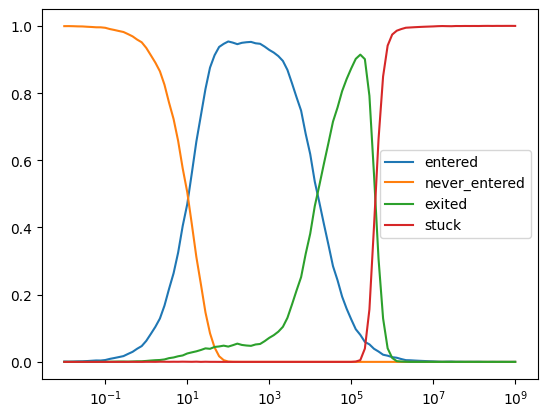

In [38]:
# ------------ PLOT ONE GRAPH ----------------
plt.xscale('log')
# plt.yscale('log')
plt.plot(receptor_densities * N, thetas, label='entered')
plt.plot(receptor_densities * N, never_entered, label='never_entered')
# plt.plot(receptor_densities * N, entered, label='entered')
plt.plot(receptor_densities * N, exited, label='exited')
plt.plot(receptor_densities * N, stuck, label='stuck')

plt.legend()
plt.show()

In [5]:
# # ----------- FOR VARYING THE ADVANCE UNTIL TIME ------------
# # receptor_densities = np.linspace(0.0001, 1.0, num=100)
# receptor_densities = np.logspace(-4.0, 2.0, num=100)
# # print(receptor_densities)

# variable_name = 'time'
# l = 1
# u = 20
# print(np.linspace(l, u, 10))

# N = 10_000
# data_theta = {}
# data_never_entered = {}
# data_entered = {}
# data_exited = {}
# data_stuck = {}

# for variable in np.linspace(l, u, 10):
#     thetas = []
#     never_entered = []
#     entered = []
#     exited = []
#     stuck = []
#     for rd in tqdm(receptor_densities):
#         parameters = {
#             "total_ligands" : 5,
#             "attachment_rate" : 1,
#             "fatigued_attachment_rate" : 0.001,
#             "deattachment_rate" : 0.5,
#             "enter_rate" : 1,
#             "inital_collision_factor":0.1,
#             "obstruction_factor":0.001,
#             "fatigued_obstruction_factor":0.001,
#             "receptor_density":rd
#         }
#         p = particle.Fatiguing(
#             **parameters
#             )
        
#         simulation = p.simulate_many(N)
#         simulation.advance_until(variable)
        
#         theta = simulation.last_theta()
#         thetas.append(theta)

#         never_entered_counter = 0
#         enter_counter = 0
#         exit_counter = 0
#         stuck_counter = 0
#         history = simulation.transition_histories()
#         for i in range(N):
#             ihistory = history[i]
#             parhis = [(transition.target.attached_ligands, transition.target.has_entered, transition.target.has_exited) for transition in ihistory]
#             finparhis = parhis[-1]
#             if finparhis[0] == 0:
#                 never_entered_counter += 1
#             elif finparhis[1] == True:
#                 enter_counter += 1
#             elif finparhis[2] == True:
#                 exit_counter += 1
#             else:
#                 stuck_counter += 1
#         never_entered.append(never_entered_counter / N)
#         entered.append(enter_counter / N)
#         exited.append(exit_counter / N)
#         stuck.append(stuck_counter / N)

#     data_theta[variable] = thetas
#     data_never_entered[variable] = never_entered
#     data_entered[variable] = entered
#     data_exited[variable] = exited
#     data_stuck[variable] = stuck


In [33]:
# ------------- FOR VARYING A VARIABLE ------------------
# receptor_densities = np.linspace(0.0001, 1.0, num=100)
receptor_densities = np.logspace(-4.0, 2.0, num=100)
# print(receptor_densities)

variable_name = 'attachment_rate'
l = 0.1
u = 5
print(np.linspace(l, u, 10))

N = 10_000
data_theta = {}
data_never_entered = {}
data_entered = {}
data_exited = {}
data_stuck = {}

for variable in np.linspace(l, u, 10):
    thetas = []
    never_entered = []
    entered = []
    exited = []
    stuck = []
    for rd in tqdm(receptor_densities):
        parameters = {
            "total_ligands" : 10,
            "attachment_rate" : 1,
            "fatigued_attachment_rate" : 0.01,
            "deattachment_rate" : 0.5,
            "enter_rate" : 1,
            "inital_collision_factor":0.1,
            "obstruction_factor":0,
            "fatigued_obstruction_factor":0,
            "receptor_density":rd
        }
        parameters[variable_name]=variable
        p = particle.Fatiguing(
            **parameters
            )
        
        simulation = p.simulate_many(N)
        simulation.advance_until(20.0)
        
        theta = simulation.last_theta()
        thetas.append(theta)

        never_entered_counter = 0
        enter_counter = 0
        exit_counter = 0
        stuck_counter = 0
        history = simulation.transition_histories()
        for i in range(N):
            ihistory = history[i]
            parhis = [(transition.target.attached_ligands, transition.target.has_entered, transition.target.has_exited) for transition in ihistory]
            finparhis = parhis[-1]
            if finparhis[0] == 0:
                never_entered_counter += 1
            elif finparhis[1] == True:
                enter_counter += 1
            elif finparhis[2] == True:
                exit_counter += 1
            else:
                stuck_counter += 1
        never_entered.append(never_entered_counter / N)
        entered.append(enter_counter / N)
        exited.append(exit_counter / N)
        stuck.append(stuck_counter / N)

    data_theta[variable] = thetas
    data_never_entered[variable] = never_entered
    data_entered[variable] = entered
    data_exited[variable] = exited
    data_stuck[variable] = stuck


[0.1        0.64444444 1.18888889 1.73333333 2.27777778 2.82222222
 3.36666667 3.91111111 4.45555556 5.        ]


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.06it/s]


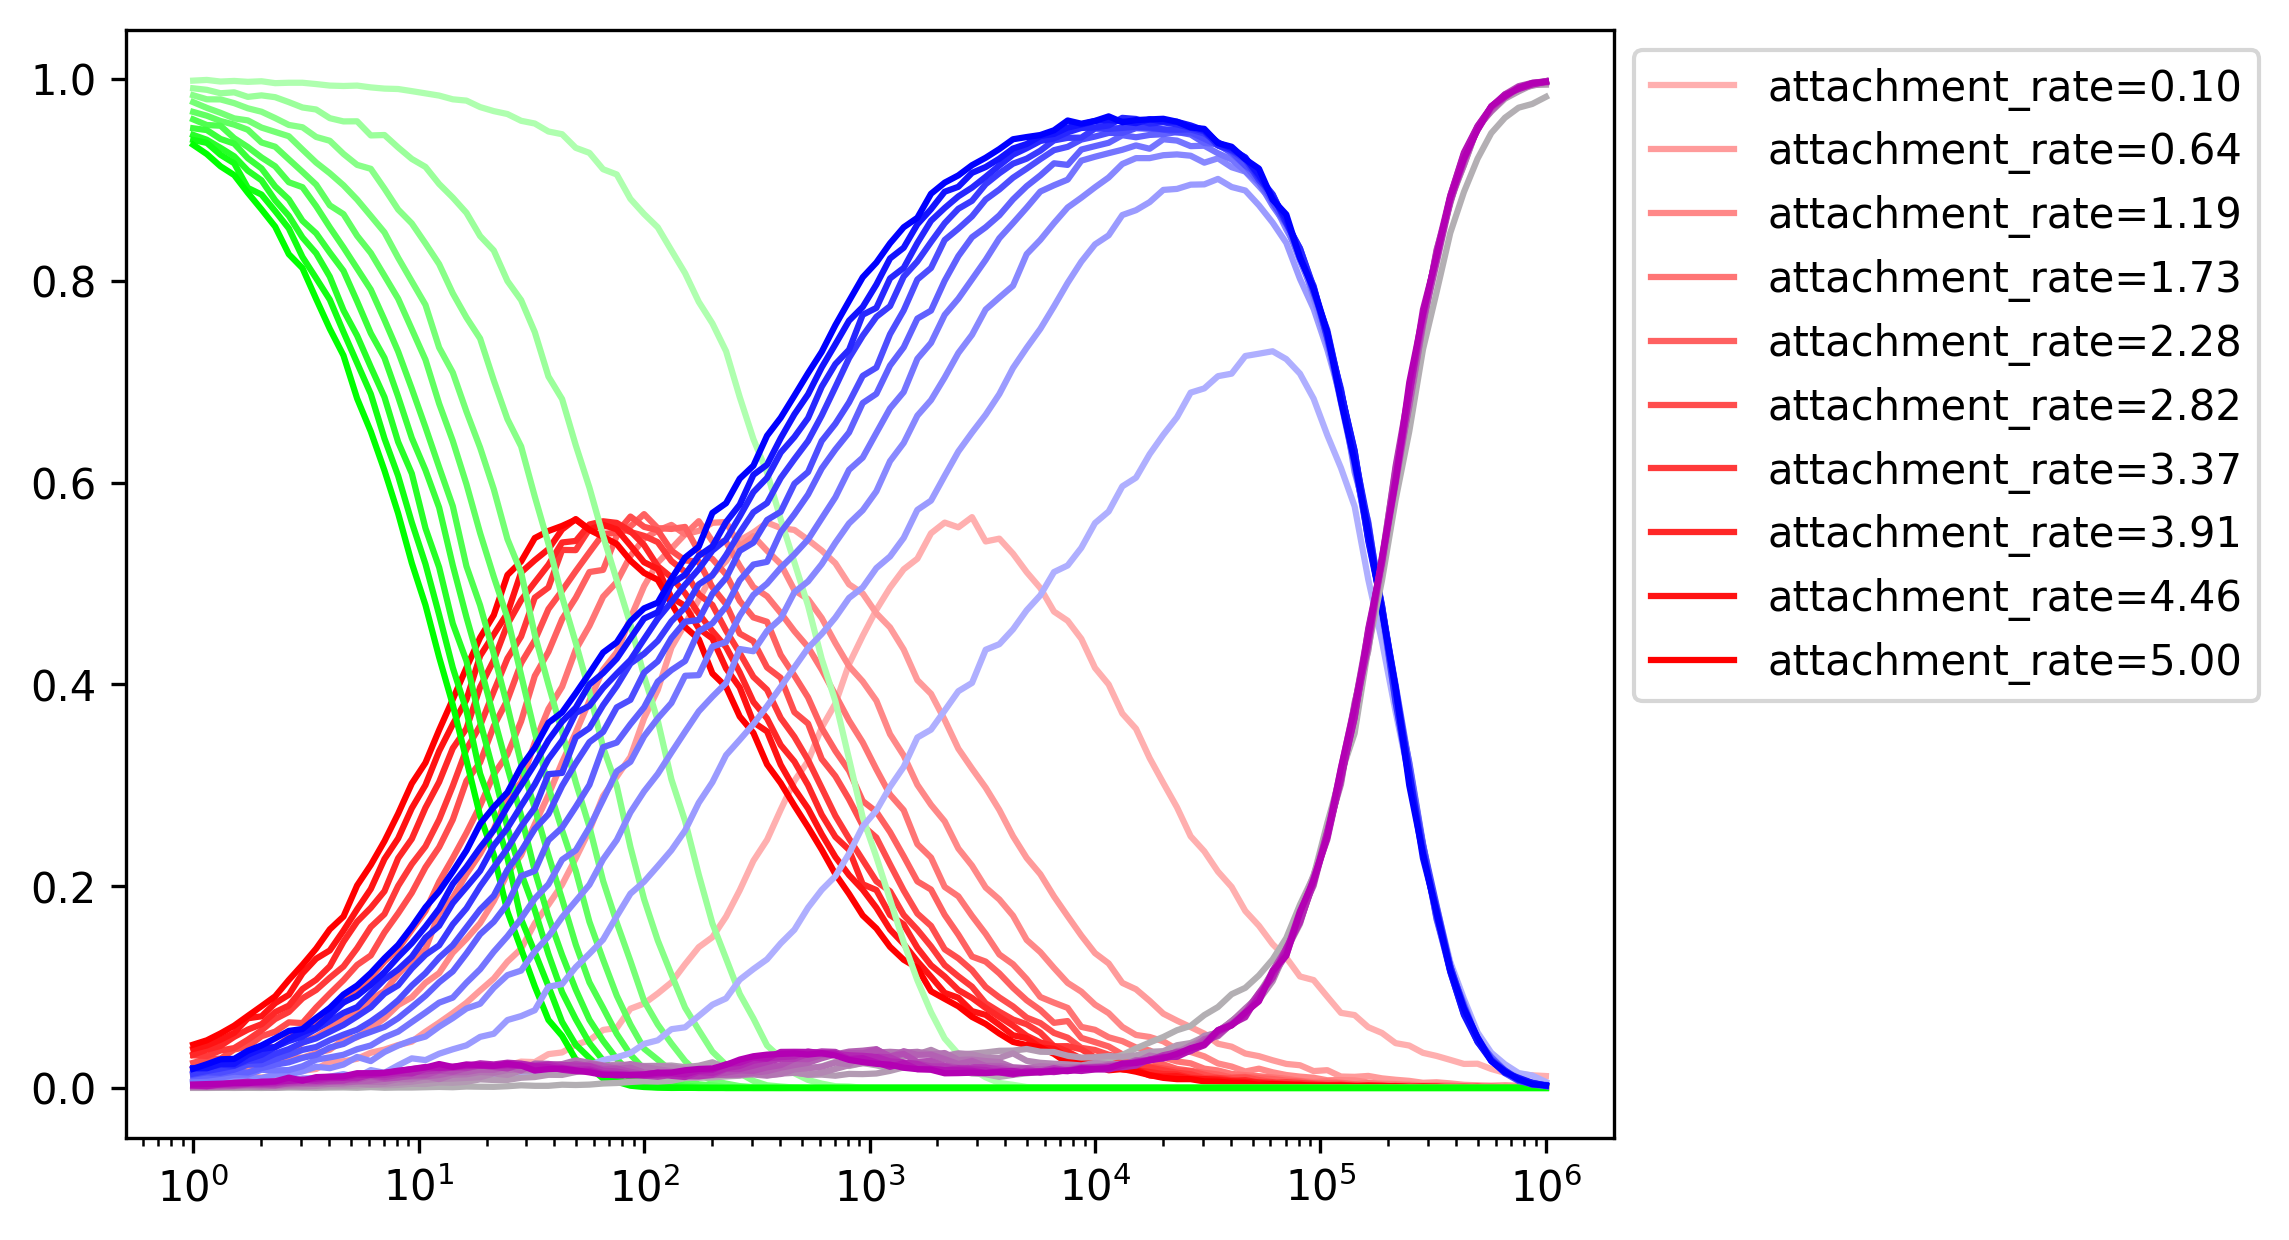

In [36]:
# ------PLOT A CHANGE OF VARIABLE ----------------
plt.figure(dpi=300)
plt.xscale('log')
# plt.yscale('log')
for variable, thetas in data_theta.items():
    plt.plot(receptor_densities * N, thetas, label=f"{variable_name}={variable:.2f}", c=(1, 0.7-0.7*variable/u, 0.7-0.7*variable/u))

for variable, never_entered in data_never_entered.items():
    plt.plot(receptor_densities * N, never_entered, c=(0.7-0.7*variable/u, 1, 0.7-0.7*variable/u))

for variable, exited in data_exited.items():
    plt.plot(receptor_densities * N, exited, c=(0.7-0.7*variable/u, 0.7-0.7*variable/u, 1))

for variable, stuck in data_stuck.items():
    plt.plot(receptor_densities * N, stuck, c=(0.7, 0.7-0.7*variable/u, 0.7))

plt.legend(bbox_to_anchor=(1.0, 1.0))


plt.show()